# 途中経過表示

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from main_latest import create_users, simulate_transmission, PRINT_MODE

# パラメータ
rate = 24  # Mbps
duration = 60  # seconds
mode = 'a'  # Transmission mode
n_values = [1, 10, 20, 30, 40, 50, 60, 70, 80]
num_simulations = 100  # 各nでのシミュレーション回数
reference_results = [17.50, 14.80, 13.60, 12.75, 12.25, 11.75, 11.25, 11.00, 10.70]  # 正解値

# 結果を格納
n_list = []
average_rates = []

# 異なるユーザー数でシミュレーションを実行
for n in n_values:
    rates = []  # このnでの各シミュレーションの結果を保存
    print(n)
    for _ in range(num_simulations):
        users = create_users(n)
        total_data_transmitted = simulate_transmission(users, duration, rate, output_mode=PRINT_MODE[2], mode=mode)
        average_rate = total_data_transmitted / duration / 10**6  # Mbps
        rates.append(average_rate)
    # 平均値を計算
    mean_rate = np.mean(rates)
    n_list.append(n)
    average_rates.append(mean_rate)

# 正解率を計算
accuracy = [
    (sim_result / ref_result) * 100
    for sim_result, ref_result in zip(average_rates, reference_results)
]

# 正解率を出力
for n, acc, ref, ave in zip(n_values, accuracy, reference_results, average_rates):
    print(f"n={n} (reference : {ref}, average : {ave:.4f} ) : Accuracy = {acc:.4f}%")

# スムーズな曲線を生成
n_array = np.array(n_list)
rate_array = np.array(average_rates)

n_smooth = np.linspace(n_array.min(), n_array.max(), 500)  # スムーズなnの範囲を生成
# smooth_rate = make_interp_spline(n_array, rate_array)(n_smooth)  # 補間を計算
smooth_rate = make_interp_spline(n_array, reference_results)(n_smooth)  # 補間を計算

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.ylim(0, 20)
plt.xlim(0, 80)

# 平均値とスムーズな曲線をプロット
plt.plot(n_list, average_rates, marker='o', label="Average Data", color='blue')

# 正解値を別のマーカーでプロット
plt.scatter(n_values, reference_results, color='red', marker='x', label="Reference Results")
plt.plot(n_smooth, smooth_rate, linestyle='--', label="Smoothed Curve")


plt.title("Average Transmission Rate vs. Number of Users")
plt.xlabel("Number of Users (n)")
plt.ylabel("Average Transmission Rate (Mbps)")
plt.grid(True)
plt.legend()
plt.show()

# 進行度のみ

Number of Users:   0%|          | 0/9 [00:00<?, ?it/s]

Simulations for n=1:   0%|          | 0/10 [00:00<?, ?it/s]

Simulations for n=10:   0%|          | 0/10 [00:00<?, ?it/s]

Simulations for n=20:   0%|          | 0/10 [00:00<?, ?it/s]

Simulations for n=30:   0%|          | 0/10 [00:00<?, ?it/s]

Simulations for n=40:   0%|          | 0/10 [00:00<?, ?it/s]

Simulations for n=50:   0%|          | 0/10 [00:00<?, ?it/s]

Simulations for n=60:   0%|          | 0/10 [00:00<?, ?it/s]

Simulations for n=70:   0%|          | 0/10 [00:00<?, ?it/s]

Simulations for n=80:   0%|          | 0/10 [00:00<?, ?it/s]

n=1 (reference : 17.85, average : 17.9099 ) : Accuracy = 100.3358%
n=10 (reference : 14.8, average : 14.8911 ) : Accuracy = 100.6155%
n=20 (reference : 13.6, average : 13.6659 ) : Accuracy = 100.4845%
n=30 (reference : 12.75, average : 12.9020 ) : Accuracy = 101.1923%
n=40 (reference : 12.25, average : 12.3431 ) : Accuracy = 100.7601%
n=50 (reference : 11.75, average : 11.8926 ) : Accuracy = 101.2138%
n=60 (reference : 11.25, average : 11.5245 ) : Accuracy = 102.4403%
n=70 (reference : 11.0, average : 11.1877 ) : Accuracy = 101.7061%
n=80 (reference : 10.7, average : 10.8947 ) : Accuracy = 101.8194%


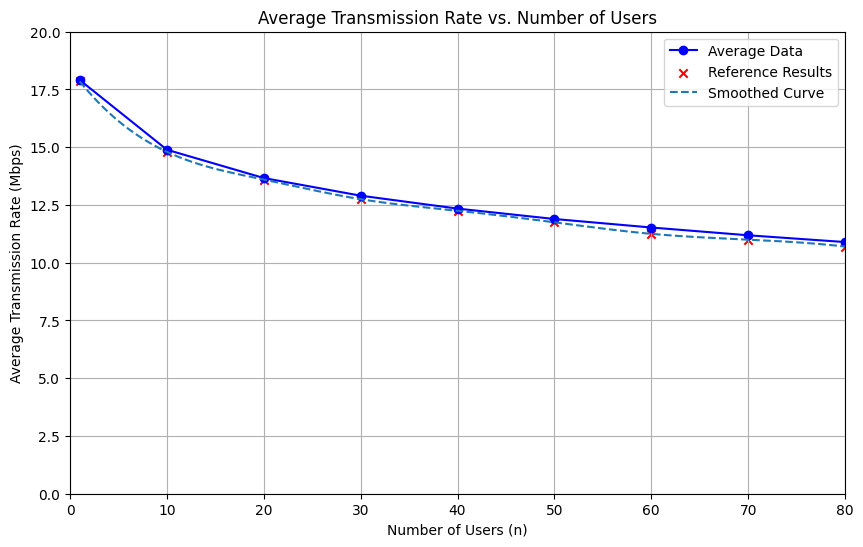

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from tqdm.notebook import tqdm
from main_latest import create_users, simulate_transmission, PRINT_MODE

# パラメータ
rate = 24  # Mbps
duration = 60  # seconds
mode = 'a'  # Transmission mode
n_values = [1, 10, 20, 30, 40, 50, 60, 70, 80]
num_simulations = 10  # 各nでのシミュレーション回数
reference_results = [17.85, 14.80, 13.60, 12.75, 12.25, 11.75, 11.25, 11.00, 10.70]  # 正解値

# 結果を格納
n_list = []
average_rates = []

# 異なるユーザー数でシミュレーションを実行
for n in tqdm(n_values, desc="Number of Users"):  # 外側のループにtqdmを追加
    rates = []  # このnでの各シミュレーションの結果を保存
    for _ in tqdm(range(num_simulations), desc=f"Simulations for n={n}", leave=False):  # 内側のループにtqdmを追加
        users = create_users(n)
        total_data_transmitted = simulate_transmission(users, duration, rate, output_mode=PRINT_MODE[3], mode=mode)
        average_rate = total_data_transmitted / duration / 10**6  # Mbps
        rates.append(average_rate)
    # 平均値を計算
    mean_rate = np.mean(rates)
    n_list.append(n)
    average_rates.append(mean_rate)

# 正解率を計算
accuracy = [
    (sim_result / ref_result) * 100
    for sim_result, ref_result in zip(average_rates, reference_results)
]

# 正解率を出力
for n, acc, ref, ave in zip(n_values, accuracy, reference_results, average_rates):
    print(f"n={n} (reference : {ref}, average : {ave:.4f} ) : Accuracy = {acc:.4f}%")

# スムーズな曲線を生成
n_array = np.array(n_list)
rate_array = np.array(average_rates)

n_smooth = np.linspace(n_array.min(), n_array.max(), 500)  # スムーズなnの範囲を生成
smooth_rate = make_interp_spline(n_array, reference_results)(n_smooth)  # 補間を計算

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.ylim(0, 20)
plt.xlim(0, 80)

# 平均値とスムーズな曲線をプロット
plt.plot(n_list, average_rates, marker='o', label="Average Data", color='blue')

# 正解値を別のマーカーでプロット
plt.scatter(n_values, reference_results, color='red', marker='x', label="Reference Results")
plt.plot(n_smooth, smooth_rate, linestyle='--', label="Smoothed Curve")


plt.title("Average Transmission Rate vs. Number of Users")
plt.xlabel("Number of Users (n)")
plt.ylabel("Average Transmission Rate (Mbps)")
plt.grid(True)
plt.legend()
plt.show()


![img](./Untitled.png)

In [ ]:
[17.5, 14.9, 13.25, 12.6, 12.3, 12.0, 11.25, 11.0]